In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.shape

(550068, 12)

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

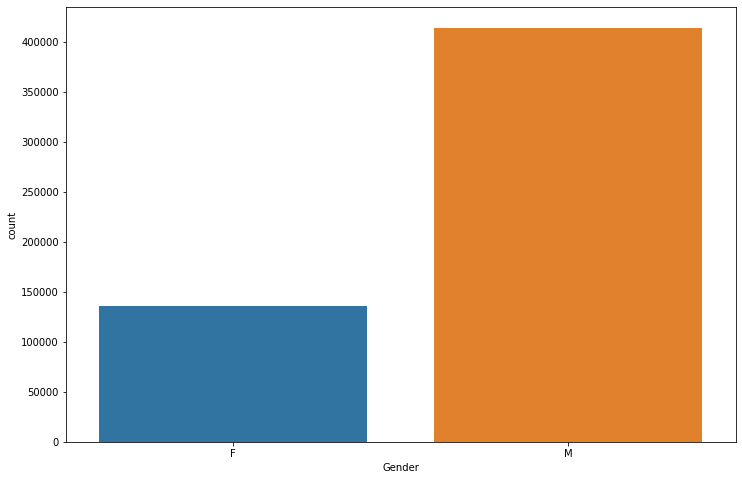

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(data= df, x="Gender")

<AxesSubplot:xlabel='Gender', ylabel='Marital_Status'>

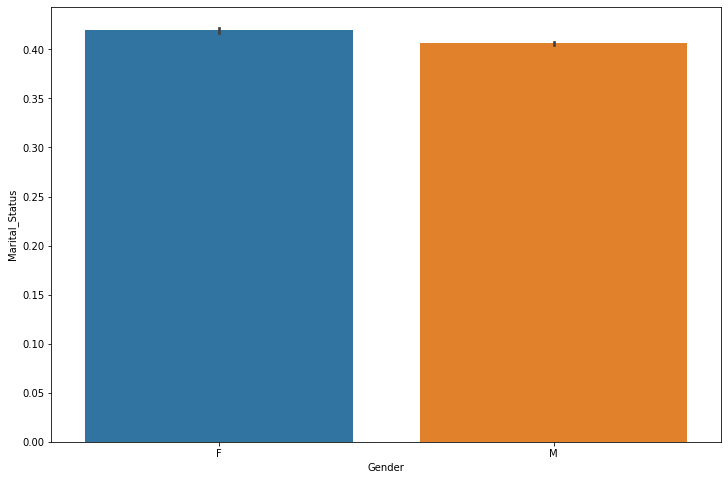

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="Gender", y="Marital_Status")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

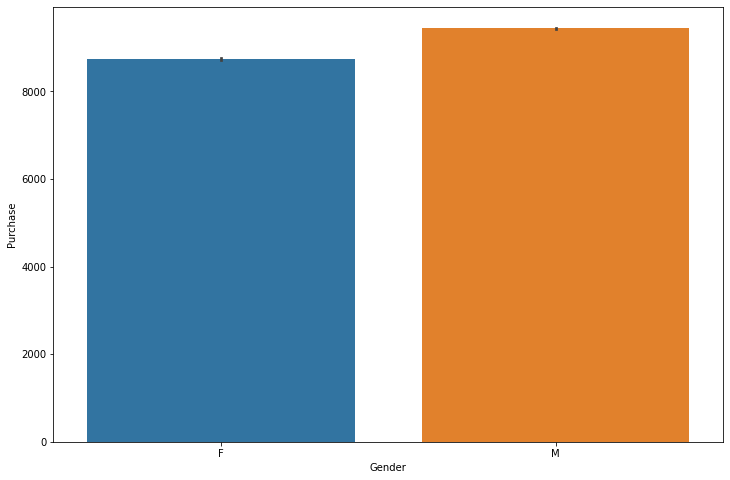

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="Gender", y="Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

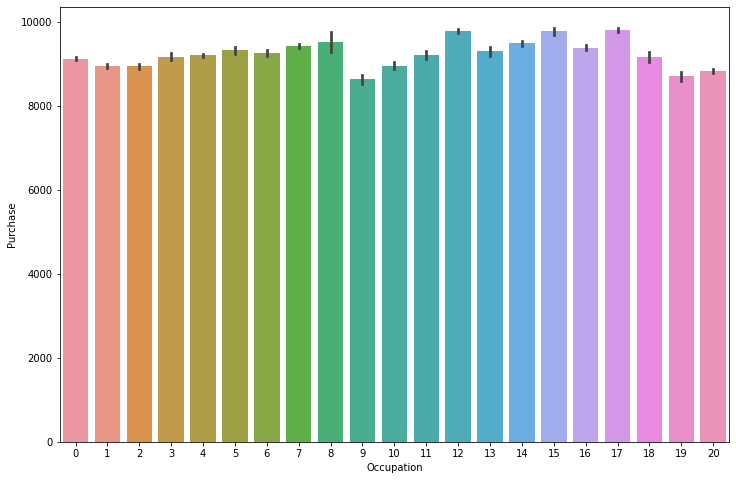

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="Occupation", y="Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

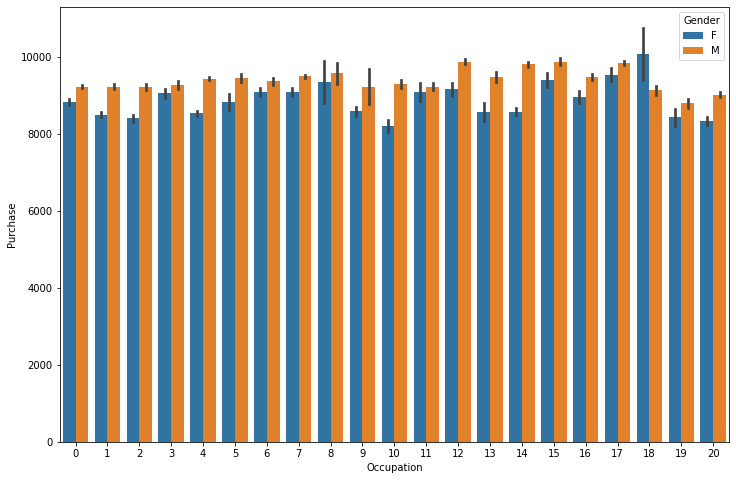

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="Occupation", y="Purchase", hue="Gender")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

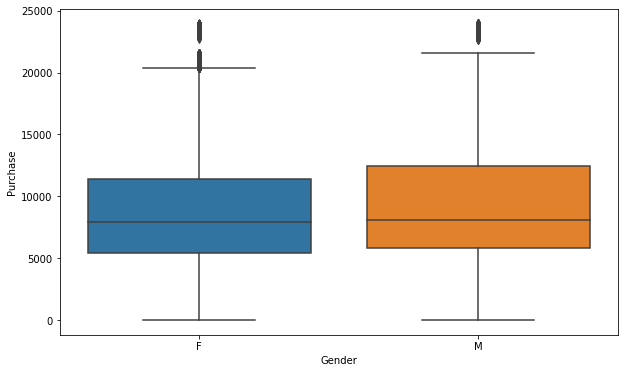

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Purchase")

In [14]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')

In [17]:
ss= StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))

In [18]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [19]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [20]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370


In [21]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Purchase                      18105
dtype: int64

In [22]:
cat_cols=["City_Category","Gender","Age"]
le= LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [25]:
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [26]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969


In [28]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [29]:
df['City_Category']=df['City_Category'].astype('category')

In [30]:
df['Purchase']=np.log(df['Purchase'])

In [31]:
df= pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


In [32]:
X=df.drop(labels=['Purchase'],axis=1)                         
Y=df['Purchase']

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [34]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [35]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [36]:
Y_predict=model.predict(X_test)

In [37]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.19954266667583043
mean_absolute_error:  0.455582842145691
mean_squared_error:  0.44136577371231095
root_mean_squared_error:  0.6643536510867619
